In [2]:
import pandas as pd
from scipy.stats import iqr
from src.main.rl.evaluation.phase3_evaluation import create_evaluation_df_phase3

paths=[
"src/main/rl/models/scenario1/training_04_06/scenario1_ActionSpaceOption3Wrapper_ObservationOption4Wrapper_None_RewardOption2Wrapper_TD3_training_04_06",
"src/main/rl/models/scenario2/training_04_06/scenario2_ActionSpaceOption3Wrapper_ObservationOption5Wrapper_None_RewardOption2Wrapper_PPO_training_04_06",


"src/main/rl/models/scenario1/training_04_06/scenario1_ActionSpaceOption3Wrapper_ObservationOption5Wrapper_NPPAutomationWrapper_RewardOption2Wrapper_SAC_training_04_06",
"src/main/rl/models/scenario2/training_04_06/scenario2_ActionSpaceOption3Wrapper_ObservationOption4Wrapper_NPPAutomationWrapper_RewardOption2Wrapper_PPO_training_04_06",
"src/main/rl/models/scenario3/training_04_06/scenario3_ActionSpaceOption3Wrapper_ObservationOption5Wrapper_NPPAutomationWrapper_RewardOption2Wrapper_A2C_training_04_06",
]
path_to_save="src/main/rl/evaluation/output/phase3_evaluation_results_new2.csv"
pd.options.display.max_colwidth = 500
df = pd.DataFrame()
try:
    df = pd.read_csv(path_to_save)
except:
    pass

if df.empty:
    df = create_evaluation_df_phase3(path_to_save,paths)


In [3]:
# Statistics over the whole dataframe
df_total1=df.drop(columns=["full_path","combination", "scenario", "alg", "action_wrapper", "obs_wrapper", "automation_wrapper"]).agg(["mean","max","min", "std"])
df_total2=df.drop(columns=["full_path","combination", "scenario", "alg", "action_wrapper", "obs_wrapper", "automation_wrapper"]).groupby(lambda x: True,dropna=True).agg([iqr])
df_total2.columns=df_total2.columns.get_level_values(0)
df_total2["index"]="iqr"
df_total=df_total1.reset_index().merge(df_total2, how="outer").set_index("index")

C:\Users\Niklas\AppData\Local\Temp\ipykernel_17652\1495946047.py:3: FutureWarning: ['condensator_pump_blown', 'water_pump_blown', 'episode_length_1000_condensator_pump_blown', 'episode_length_1000_water_pump_blown'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_total2=df.drop(columns=["full_path","combination", "scenario", "alg", "action_wrapper", "obs_wrapper", "automation_wrapper"]).groupby(lambda x: True,dropna=True).agg([iqr])


In [4]:
df_total

,Unnamed: 0,condensator_pump_blown,water_pump_blown,cum_reward,criticality_score,total_timesteps,result_wo_npp_automation,result_w_npp_automation,result_wo_npp_automation_criticality,result_w_npp_automation_criticality,...,create_starting_state_option2c_timesteps,create_starting_state_option3,create_starting_state_option3_criticality,create_starting_state_option3_timesteps,create_starting_state_option3a,create_starting_state_option3a_criticality,create_starting_state_option3a_timesteps,create_starting_state_option3b,create_starting_state_option3b_criticality,create_starting_state_option3b_timesteps
index,,,,,,,,,,,,,,,,,,,,,
mean,24.50000,0.0,0.0,213.774193,204.846519,249.940000,106.442890,88.386957,115.596282,101.191800,...,161.200000,178.961593,169.603455,219.940000,195.033778,191.620266,238.56000,181.241255,172.917086,226.340000
max,49.00000,False,False,242.529160,237.439009,250.000000,218.328033,243.144135,222.150540,236.623000,...,250.000000,239.402220,212.164446,250.000000,239.752370,222.741230,250.00000,237.843720,210.872382,250.000000
min,0.00000,False,False,145.754330,172.821218,247.000000,1.164286,3.530000,3.831067,7.664063,...,1.000000,0.000000,1.018888,2.000000,0.000000,0.446154,1.00000,0.000000,0.423077,1.000000
std,14.57738,0.0,0.0,24.752584,18.536513,0.424264,94.964465,91.801394,95.785500,95.045377,...,103.419692,62.713508,54.735257,67.367833,42.331219,39.032132,44.11819,52.908493,48.638527,60.207332
iqr,24.50000,NaN,NaN,30.351072,34.408927,0.000000,NaN,NaN,NaN,NaN,...,196.000000,40.088575,30.442326,0.000000,42.933825,19.365677,0.00000,36.311365,22.308165,0.000000


In [5]:
# EXP1: Criticality Score across all 60 models
print(df_total[["criticality_score"]].to_latex())

\begin{tabular}{lr}
\toprule
{} &  criticality\_score \\
index &                    \\
\midrule
mean  &         204.846519 \\
max   &         237.439009 \\
min   &         172.821218 \\
std   &          18.536513 \\
iqr   &          34.408927 \\
\bottomrule
\end{tabular}



C:\Users\Niklas\AppData\Local\Temp\ipykernel_17652\2461436129.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_total[["criticality_score"]].to_latex())


In [6]:
# Statistics per combination
df_statistics_per_combination = (
    df.drop(columns=["full_path"]).groupby(
        ["combination", "scenario", "alg", "action_wrapper", "obs_wrapper", "automation_wrapper"], dropna=False)
        .agg(["mean","max","min", "std", iqr])
)
# Necessary to set index as alphabetical is confusing for the thesis 
df_statistics_per_combination["index"]=([0,1,3,2,5,4])
df_statistics_per_combination=df_statistics_per_combination.reset_index().set_index(["index","combination"]).sort_index()
df_statistics_per_combination.columns = ["_".join(a) for a in df_statistics_per_combination.columns.to_flat_index()]
save_df_per_combination=df_statistics_per_combination.copy()
df_statistics_per_combination

C:\Users\Niklas\AppData\Local\Temp\ipykernel_17652\2027214207.py:3: FutureWarning: ['condensator_pump_blown', 'water_pump_blown', 'episode_length_1000_condensator_pump_blown', 'episode_length_1000_water_pump_blown'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.drop(columns=["full_path"]).groupby(


ValueError: Length of values (6) does not match length of index (5)

In [5]:
# EXP1: Criticality Score per combination
print(df_statistics_per_combination[["criticality_score_mean"]].round(2))
print(df_statistics_per_combination[["criticality_score_mean","criticality_score_max","criticality_score_min","criticality_score_std","criticality_score_iqr"]].droplevel(1).transpose().round(2).to_latex())


                                                                                                                                                                              criticality_score_mean
index combination                                                                                                                                                                                   
0     src/main/rl/models/scenario1/training_04_06/scenario1_ActionSpaceOption3Wrapper_ObservationOption4Wrapper_None_RewardOption2Wrapper_TD3_training_04_06                                  192.26
1     src/main/rl/models/scenario1/training_04_06/scenario1_ActionSpaceOption3Wrapper_ObservationOption5Wrapper_NPPAutomationWrapper_RewardOption2Wrapper_SAC_training_04_06                  190.93
2     src/main/rl/models/scenario2/training_04_06/scenario2_ActionSpaceOption3Wrapper_ObservationOption5Wrapper_None_RewardOption2Wrapper_PPO_training_04_06                                  220.51
3     src/main/

C:\Users\Niklas\AppData\Local\Temp\ipykernel_1872\3201395392.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_statistics_per_combination[["criticality_score_mean","criticality_score_max","criticality_score_min","criticality_score_std","criticality_score_iqr"]].droplevel(1).transpose().round(2).to_latex())


In [ ]:
import pandas as pd
from src.main.rl.utils.parser import parse_wrapper
from src.main.rl.utils.combined_parser import parse_information_from_path
from src.main.rl.evaluation.eval import evaluate

paths_best_models = [
    "src/main/rl/models/scenario1/training_04_06/scenario1_ActionSpaceOption3Wrapper_ObservationOption4Wrapper_None_RewardOption2Wrapper_TD3_training_04_06",
    "src/main/rl/models/scenario1/training_04_06/scenario1_ActionSpaceOption3Wrapper_ObservationOption5Wrapper_NPPAutomationWrapper_RewardOption2Wrapper_SAC_training_04_06",
    
    "src/main/rl/models/scenario2/training_04_06/scenario2_ActionSpaceOption3Wrapper_ObservationOption5Wrapper_None_RewardOption2Wrapper_PPO_training_04_06",
    "src/main/rl/models/scenario2/training_04_06/scenario2_ActionSpaceOption3Wrapper_ObservationOption4Wrapper_NPPAutomationWrapper_RewardOption2Wrapper_PPO_training_04_06",
    
    "src/main/rl/models/scenario3/training_04_06/scenario3_ActionSpaceOption3Wrapper_ObservationOption5Wrapper_None_RewardOption2Wrapper_PPO_training_04_06",
    "src/main/rl/models/scenario3/training_04_06/scenario3_ActionSpaceOption3Wrapper_ObservationOption5Wrapper_NPPAutomationWrapper_RewardOption2Wrapper_A2C_training_04_06",
]
# Choose one Combiniation:

def prepare_one_combiniation_actions_and_obs_for_analysis(path_to_model:str,episode_length:int=250,number_of_models:int=10):
    # This function transforms the actions and observations for all ten models per combination so that we can easily aggregated per timestep and create
    # the corresponding statistics per timestamp and not only over the whole evaluation.
    # It returns a list of 5 dataframes. Each for one dimension of the action space. In the dataframe we have 250 rows (one per timestamp)
    # and 10 columns with the different models/runs. so if we aggregate of the columns we get the statistics for a action dimession over the 250 episodes (rows).
    # Same with different number of df for obs.
    # Also returns just a list were all actions taken and obs taken are appended.
    result_list_actions=[pd.DataFrame() for i in range(5)]
    result_list_obs=[pd.DataFrame() for i in range(6)]
    
    list_of_all_actions_taken=[]
    list_of_all_obs_taken=[]
    
    for number in range(1,number_of_models+1): # change to range(1,10) to not have model 10 in this. Which seems to be an otuliers model for combination 1.
        result_dict = {}
        full_path = path_to_model + f"_{number}"
        path_to_overhand = full_path + "/best_model.zip"
            
        action_wrapper, automation_wrapper, obs_wrapper, reward_wrapper = parse_wrapper(full_path)
        scenario, alg, wrapper_maker = parse_information_from_path(full_path)
        # Switch episode length here
        cum_reward, criticality_score, total_timesteps, actions_taken, obs_taken,info = evaluate(scenario, path_to_overhand, alg, wrapper_maker, episode_length=episode_length)
        # actions taken is a list of lists. The first list contains 250 further list (one per timestep). The inner list contaijs 5 values (one per dimension in the action space)
        list_of_all_actions_taken.append(actions_taken)
        list_of_all_obs_taken.append(obs_taken)
        intermediate_df_actions=pd.DataFrame(actions_taken)
        intermediate_df_obs=pd.DataFrame(obs_taken)
        result_list_actions[0]=result_list_actions[0].join(intermediate_df_actions[0].rename(f"action_0_run_{number}").to_frame(), how="outer")
        result_list_actions[1]=result_list_actions[1].join(intermediate_df_actions[1].rename(f"action_1_run_{number}").to_frame(), how="outer")
        result_list_actions[2]=result_list_actions[2].join(intermediate_df_actions[2].rename(f"action_2_run_{number}").to_frame(), how="outer")
        result_list_actions[3]=result_list_actions[3].join(intermediate_df_actions[3].rename(f"action_3_run_{number}").to_frame(), how="outer")
        result_list_actions[4]=result_list_actions[4].join(intermediate_df_actions[4].rename(f"action_4_run_{number}").to_frame(), how="outer")
        
        result_list_obs[0]=result_list_obs[0].join(intermediate_df_obs[0].rename(f"action_0_run_{number}").to_frame(), how="outer")
        result_list_obs[1]=result_list_obs[1].join(intermediate_df_obs[1].rename(f"action_1_run_{number}").to_frame(), how="outer")
        result_list_obs[2]=result_list_obs[2].join(intermediate_df_obs[2].rename(f"action_2_run_{number}").to_frame(), how="outer")
        result_list_obs[3]=result_list_obs[3].join(intermediate_df_obs[3].rename(f"action_3_run_{number}").to_frame(), how="outer")
        result_list_obs[4]=result_list_obs[4].join(intermediate_df_obs[4].rename(f"action_4_run_{number}").to_frame(), how="outer")
        result_list_obs[5]=result_list_obs[5].join(intermediate_df_obs[5].rename(f"action_5_run_{number}").to_frame(), how="outer")
    return result_list_actions, result_list_obs,list_of_all_actions_taken,list_of_all_obs_taken

path=paths_best_models[0]
actions_prepared, obs_prepared,list_of_all_actions_taken,list_of_all_obs_taken=prepare_one_combiniation_actions_and_obs_for_analysis(path)


In [ ]:
# Actions Analysis Combi 1
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
scaling_factors_scenario_1 = [100, 2000, 1, 1, 2000]
color_mapping = {
    "standard": "#1D2D5F",
    "red":"#F65E5D",
    "orange": "#FF8800",
}
for idx,item in enumerate(actions_prepared):
    item=item.applymap(lambda x: int(round((x + 1) * (scaling_factors_scenario_1[idx] / 2))))
    actions_prepared[idx]=item.agg(["mean","min","max","std"],axis=1)
    actions_prepared[idx]["minus"]=actions_prepared[idx]["mean"]-actions_prepared[idx]["std"]
    actions_prepared[idx]["plus"]=actions_prepared[idx]["mean"]+actions_prepared[idx]["std"]

In [ ]:
# Actions Analysis Combi 1
from src.main.rl.utils.constants import (
    scaling_factors_scenario_1,
    action_dimensions_german)
fig, ax = plt.subplots(1, 5,constrained_layout=True)
fig.set_figheight(3) 
fig.set_figwidth(20) 
[ax[idx].plot(item["mean"],color=color_mapping["standard"]) for idx, item in enumerate(actions_prepared)]
#[ax[idx].fill_between([i for i in range(250)],item["plus"],item["minus"],color=color_mapping["standard"],alpha=0.3) for idx, item in enumerate(result_list)]
[ax[idx].fill_between([i for i in range(250)],item["min"],item["max"],color=color_mapping["standard"],alpha=0.3) for idx, item in enumerate(actions_prepared)]
[ax[idx].set_xlabel("Zeitschritte") for idx in range(5)]
[ax[idx].set_ylabel("Value") for idx in range(5)]
[ax[idx].set_title(action_dimensions_german[idx]) for idx in range(5)]

#fig.savefig(
#    f"src/main/rl/evaluation/plot_results/phase3_actions_plot_with_min_max_scen1_w.png",
#    format="png",
#    dpi=300,
#)
plt.show()

In [ ]:
# Action: Modell 10  Combi 1
from src.main.rl.evaluation.eval import plot_actions_taken
scenario="scenario1"
y_axis_scale=[[0, 100], [0, 2200], [0, 1.2], [0, 1.2], [0, 2200]]
fig=plot_actions_taken(list_of_all_actions_taken[9], scenario,y_axis_scale)
#fig.savefig(
#    f"src/main/rl/evaluation/plot_results/phase3_actions_plots_scen1_wo_smoothest.png",
#    format="png",
#    dpi=300,
#)

In [ ]:
# Create Actions Mean without model 10
path=paths_best_models[0]
actions_prepared_wo_10, obs_prepared_wo_10,list_of_all_actions_taken_wo_10,list_of_all_obs_take_wo_10n=prepare_one_combiniation_actions_and_obs_for_analysis(path,number_of_models=9)
for idx,item in enumerate(actions_prepared_wo_10):
    item=item.applymap(lambda x: int(round((x + 1) * (scaling_factors_scenario_1[idx] / 2))))
    actions_prepared_wo_10[idx]=item.agg(["mean","min","max","std"],axis=1)
    actions_prepared_wo_10[idx]["minus"]=actions_prepared_wo_10[idx]["mean"]-actions_prepared_wo_10[idx]["std"]
    actions_prepared_wo_10[idx]["plus"]=actions_prepared_wo_10[idx]["mean"]+actions_prepared_wo_10[idx]["std"]
fig, ax = plt.subplots(1, 5,constrained_layout=True)
fig.set_figheight(3) 
fig.set_figwidth(20) 
[ax[idx].plot(item["mean"],color=color_mapping["standard"]) for idx, item in enumerate(actions_prepared_wo_10)]
[ax[idx].fill_between([i for i in range(250)],item["min"],item["max"],color=color_mapping["standard"],alpha=0.3) for idx, item in enumerate(actions_prepared_wo_10)]
[ax[idx].set_xlabel("Zeitschritte") for idx in range(5)]
[ax[idx].set_ylabel("Value") for idx in range(5)]
[ax[idx].set_title(action_dimensions_german[idx]) for idx in range(5)]

In [ ]:
# Action: Modell 2  Combi 1
from src.main.rl.evaluation.eval import plot_actions_taken
scenario="scenario1"
y_axis_scale=[[0, 100], [0, 2200], [0, 1.2], [0, 1.2], [0, 2200]]
fig=plot_actions_taken(list_of_all_actions_taken[2], scenario,y_axis_scale)
#fig.savefig(
#    f"src/main/rl/evaluation/plot_results/phase3_actions_plots_scen1_wo_smoothest.png",
#    format="png",
#    dpi=300,
#)

In [ ]:
# Actions print all combinations from scen 1
from src.main.rl.evaluation.eval import plot_actions_taken
y_axis_scale=[[0, 100], [0, 2200], [0, 1.2], [0, 1.2], [0, 2200]]
for idx,actions_taken in enumerate(list_of_all_actions_taken):
    print(f"combination {idx}")
    plot_actions_taken(actions_taken, scenario,y_axis_scale)


In [ ]:
#Observation prep 
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from src.main.rl.utils.constants import (
    scaling_factors_scenario_1,
    scaling_factors_scenario2,
    action_dimensions_german,
    obs_dimensions_german,
    obs_scaling_factors,
    obs_dimensions,
    scaling_factors_scenario3,
)
obs_space_size = 6

current_obs_scaling_factors = obs_scaling_factors[obs_space_size]

agg_result_list_obs=[pd.DataFrame() for _ in range(6)]
for idx,item in enumerate(obs_prepared):
    item=item.fillna(0)
    item=item.applymap(lambda x: int(round((x + 1) * (current_obs_scaling_factors[idx] / 2))))
    agg_result_list_obs[idx]=item.agg(["mean","min","max","std"],axis=1)
    agg_result_list_obs[idx]["minus"]=agg_result_list_obs[idx]["mean"]-agg_result_list_obs[idx]["std"]
    agg_result_list_obs[idx]["plus"]=agg_result_list_obs[idx]["mean"]+agg_result_list_obs[idx]["std"]


In [ ]:

import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
obs_space_size = 6
current_obs_scaling_factors = obs_scaling_factors[obs_space_size]
color_mapping = {
    "standard": "#1D2D5F",
    "red":"#F65E5D",
    "orange": "#FF8800",
}

#Plot
y_axis_scale=[[0,1000],[0,4000],[0,550],[0,8000],[0,180],[0,32]]
red_critical_line_1=[-10,2800,450,5100,110,4]
red_critical_line_2=[-10,1200,-10,800,-10,-10]
orange_critical_line_1=[-10,2500,350,4400,80,9]
orange_critical_line_2=[-10,1500,-10,1500,-10,-10]
dead_line_1=[-10,2900, 500,5300,140,0]
dead_line_2=[-10,1000,-10,300,-10,-10]

fig, ax = plt.subplots(1, int(obs_space_size),constrained_layout=True)
fig.set_figheight(3) 
fig.set_figwidth(20) 
[ax[idx].plot(item["mean"],color=color_mapping["standard"]) for idx, item in enumerate(agg_result_list_obs)]
[ax[idx].fill_between([i for i in range(250)],item["min"],item["max"],color=color_mapping["standard"],alpha=0.3) for idx, item in enumerate(agg_result_list_obs)]
[ax[idx].set_xlabel("Zeitschritte") for idx in range(obs_space_size)]
[ax[idx].set_ylabel("Value") for idx in range(obs_space_size)]
[ax[idx].set_title(obs_dimensions_german[obs_space_size][idx]) for idx in range(obs_space_size)]
[ax[idx].axhline(red_critical_line_1[idx],color=color_mapping["red"],ls='--') for idx in range(obs_space_size)]
[ax[idx].axhline(red_critical_line_2[idx],color=color_mapping["red"],ls='--') for idx in range(obs_space_size)]
[ax[idx].axhline(orange_critical_line_1[idx],color=color_mapping["orange"],ls='--') for idx in range(obs_space_size)]
[ax[idx].axhline(orange_critical_line_2[idx],color=color_mapping["orange"],ls='--') for idx in range(obs_space_size)]
[ax[idx].axhline(dead_line_1[idx],color="black",ls='--') for idx in range(obs_space_size)]
[ax[idx].axhline(dead_line_2[idx],color="black",ls='--') for idx in range(obs_space_size)]
[ax[idx].set_ylim(y_axis_scale[idx]) for idx in range(obs_space_size)]

#fig.savefig(
#    f"src/main/rl/evaluation/plot_results/phase3_obs_plot_with_min_max_scen1_wo_all_models.png",
#    format="png",
#    dpi=300,
#)
#plt.show()

In [ ]:
# Obs: Print specific models
from src.main.rl.evaluation.eval import plot_observations
y_axis_scale=[[0, 1000], [0, 4000], [0, 550], [0, 8000], [0, 180],[0, 32]]
fig=plot_observations(list_of_all_obs_taken[6],y_axis_scale)
#fig.savefig(
#    f"src/main/rl/evaluation/plot_results/phase3_actions_plots_scen1_wo_smoothest.png",
#    format="png",
#    dpi=300,
#)
from src.main.rl.evaluation.eval import plot_observations
y_axis_scale=[[0, 1000], [0, 4000], [0, 550], [0, 8000], [0, 180],[0, 32]]
fig=plot_observations(list_of_all_obs_taken[2],y_axis_scale)
#fig.savefig(
#    f"src/main/rl/evaluation/plot_results/phase3_obs_scen1_wo_combi8_increasing_wl_1000_ep_failure.png",
#    format="png",
#    dpi=300,
#)

In [ ]:
# Obs print all combinations from scen 1
from src.main.rl.evaluation.eval import plot_observations,plot_actions_taken

y_axis_scale=[[0, 1000], [0, 4000], [0, 550], [0, 8000], [0, 180],[0, 32]]
for idx,obs_taken in enumerate(list_of_all_obs_taken):
    print(f"combination {idx}")
    plot_observations(obs_taken,y_axis_scale)


In [ ]:
#Obs prep - This cell and the next can only be run if the other cell for calculating the agg statistics 
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from src.main.rl.utils.constants import (
    scaling_factors_scenario_1,
    scaling_factors_scenario2,
    action_dimensions_german,
    obs_dimensions_german,
    obs_scaling_factors,
    obs_dimensions,
    scaling_factors_scenario3,
)
obs_space_size = 6

current_obs_scaling_factors = obs_scaling_factors[obs_space_size]
no_agg_result_list_obs=[pd.DataFrame() for _ in range(6)]
for idx,item in enumerate(obs_prepared):
    no_agg_result_list_obs[idx]=item.applymap(lambda x: int(round((x + 1) * (current_obs_scaling_factors[idx] / 2))))

In [ ]:
#Obs
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from src.main.rl.utils.constants import (
    scaling_factors_scenario_1,
    scaling_factors_scenario2,
    action_dimensions_german,
    obs_dimensions_german,
    obs_scaling_factors,
    obs_dimensions,
    scaling_factors_scenario3,
)
color_mapping = {
    "standard": "#1D2D5F",
    "red":"#F65E5D",
    "orange": "#FF8800",
}
#Plot
y_axis_scale=[[0,1000],[0,4000],[0,550],[0,8000],[0,180],[0,32]]
red_critical_line_1=[-10,2800,450,5100,110,4]
red_critical_line_2=[-10,1200,-10,800,-10,-10]
orange_critical_line_1=[-10,2500,350,4400,80,9]
orange_critical_line_2=[-10,1500,-10,1500,-10,-10]
dead_line_1=[-10,2900, 500,5300,140,0]
dead_line_2=[-10,1000,-10,300,-10,-10]
obs_space_size = 6
fig, ax = plt.subplots(int(obs_space_size),1 ,constrained_layout=True)
fig.set_figheight(26) 
fig.set_figwidth(10)
for number in range(0,10):
    [ax[idx].plot(item.iloc[:,number],color=color_mapping["standard"]) for idx, item in enumerate(no_agg_result_list_obs)]
    
    #[ax[idx].plot(item[column],color=color_mapping["standard"]) for idx, item in enumerate(no_agg_result_list_obs)]

[ax[idx].set_xlabel("Zeitschritte") for idx in range(obs_space_size)]
[ax[idx].set_ylabel("Value") for idx in range(obs_space_size)]
[ax[idx].set_title(obs_dimensions_german[obs_space_size][idx]) for idx in range(obs_space_size)]
[ax[idx].axhline(red_critical_line_1[idx],color=color_mapping["red"],ls='--') for idx in range(obs_space_size)]
[ax[idx].axhline(red_critical_line_2[idx],color=color_mapping["red"],ls='--') for idx in range(obs_space_size)]
[ax[idx].axhline(orange_critical_line_1[idx],color=color_mapping["orange"],ls='--') for idx in range(obs_space_size)]
[ax[idx].axhline(orange_critical_line_2[idx],color=color_mapping["orange"],ls='--') for idx in range(obs_space_size)]
[ax[idx].axhline(dead_line_1[idx],color="black",ls='--') for idx in range(obs_space_size)]
[ax[idx].axhline(dead_line_2[idx],color="black",ls='--') for idx in range(obs_space_size)]
[ax[idx].set_ylim(y_axis_scale[idx]) for idx in range(obs_space_size)]

#fig.savefig(
#    f"src/main/rl/evaluation/plot_results/phase3_obs_plot_with_min_max_scen1_wo_all_models.png",
#    format="png",
#    dpi=300,
#)
#plt.show()

In [ ]:
# SOP Analysis
from src.main.rl.evaluation.eval import evaluate_sop

cum_reward_sop, criticality_score_sop, total_timesteps_sop, actions_taken_sop, obs_taken_sop, info_sop = evaluate_sop()


In [ ]:
from src.main.rl.evaluation.eval import plot_observations,plot_actions_taken
y_axis_scale_actions=[[0,100],[0,2200],[0,1.1],[0,1.1],[0,2200]]
fig=plot_actions_taken(actions_taken_sop,"scenario1",y_axis_scale_actions)
#fig.savefig(
#    f"src/main/rl/evaluation/plot_results/phase3_action_sop.png",
#    format="png",
#    dpi=300,
#)

In [ ]:
from src.main.rl.evaluation.eval import plot_observations,plot_actions_taken

y_axis_scale_obs=[[0, 1000], [0, 4000], [0, 550], [0, 8000], [0, 180],[0, 32]]
fig=plot_observations(obs_taken_sop,y_axis_scale_obs)
#fig.savefig(
#    f"src/main/rl/evaluation/plot_results/phase3_obs_sop.png",
#    format="png",
#    dpi=300,
#)

In [ ]:
# 1000 length
cols=[item for item in df_statistics_per_combination.columns if "1000" in item]
df_statistics_per_combination[cols].round(2)


In [ ]:
# EXP1: Criticality Score per combination
print(df_statistics_per_combination[["episode_length_1000_mean"]].round(2))


print(df_statistics_per_combination[cols].round(2).droplevel(1)[["episode_length_1000_mean","episode_length_1000_max","episode_length_1000_std","episode_length_1000_iqr","episode_length_1000_timesteps_mean"]].transpose().to_latex())

In [ ]:
# 1000 length statistics over the whole df
cols=[item for item in df_total.columns if "1000" in item]
df_total[cols].round(2)


In [ ]:
df[["episode_length_1000_condensator_pump_blown","episode_length_1000_water_pump_blown"]].sum()

In [ ]:
cols=[item for item in df_statistics_per_combination.columns if "criti" in item]
df_statistics_per_combination[cols].round(2)

In [11]:
############## Start: Exp Noise ###################
cols=[item for item in df_statistics_per_combination.columns if "DelayNoise" in item]
df_statistics_per_combination[cols].round(2)

print(df_statistics_per_combination[["DelayNoiseWrapperOption1_mean"]].round(2))
print(df_statistics_per_combination[cols].round(2).droplevel(1)[["DelayNoiseWrapperOption1_mean","DelayNoiseWrapperOption1_max","DelayNoiseWrapperOption1_min","DelayNoiseWrapperOption1_std","DelayNoiseWrapperOption1_iqr","DelayNoiseWrapperOption2_mean","DelayNoiseWrapperOption2_max","DelayNoiseWrapperOption2_min","DelayNoiseWrapperOption2_std","DelayNoiseWrapperOption2_iqr"]].transpose().to_latex())


                                                                                                                                                                              DelayNoiseWrapperOption1_mean
index combination                                                                                                                                                                                          
0     src/main/rl/models/scenario1/training_04_06/scenario1_ActionSpaceOption3Wrapper_ObservationOption4Wrapper_None_RewardOption2Wrapper_TD3_training_04_06                                         202.85
1     src/main/rl/models/scenario1/training_04_06/scenario1_ActionSpaceOption3Wrapper_ObservationOption5Wrapper_NPPAutomationWrapper_RewardOption2Wrapper_SAC_training_04_06                         234.01
2     src/main/rl/models/scenario2/training_04_06/scenario2_ActionSpaceOption3Wrapper_ObservationOption5Wrapper_None_RewardOption2Wrapper_PPO_training_04_06                            

C:\Users\Niklas\AppData\Local\Temp\ipykernel_17936\1080892921.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_statistics_per_combination[cols].round(2).droplevel(1)[["DelayNoiseWrapperOption1_mean","DelayNoiseWrapperOption1_max","DelayNoiseWrapperOption1_min","DelayNoiseWrapperOption1_std","DelayNoiseWrapperOption1_iqr","DelayNoiseWrapperOption2_mean","DelayNoiseWrapperOption2_max","DelayNoiseWrapperOption2_min","DelayNoiseWrapperOption2_std","DelayNoiseWrapperOption2_iqr"]].transpose().to_latex())


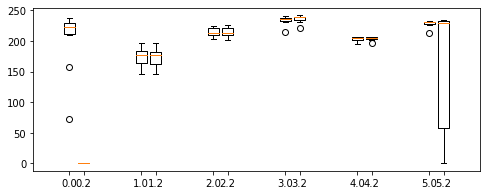

In [34]:
fig, ax = plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(8)
for idx,item in enumerate(delay_noise["combination"].unique()):
    ax.boxplot(delay_noise.query(f"combination=='{item}'")[["DelayNoiseWrapperOption1","DelayNoiseWrapperOption2"]],positions=[idx,idx+0.2])


#ax.boxplot(delay_noise.query("automation_wrapper=='NPPAutomationWrapper'")[["DelayNoiseWrapperOption1","DelayNoiseWrapperOption2"]],positions=[1,1.2])
plt.show()



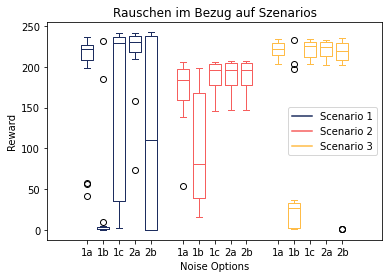

In [53]:
def set_box_color(bp, color,idx):
    plt.setp(bp["boxes"], color=color)
    plt.setp(bp["whiskers"], color=color)
    plt.setp(bp["caps"], color=color)
    plt.setp(bp["medians"], color=color)
    plt.setp(bp["caps"], color=color)
    plt.setp(bp["fliers"], color=color)
import matplotlib.pyplot as plt
from src.main.rl.utils.constants import color_mapping

delay_varies_noise=df[["obs_wrapper","automation_wrapper","scenario","DelayNoiseWrapperOption2","DelayNoiseWrapperOption1","combination","ObservationVariesNoiseWrapper1","ObservationVariesPositiveNoiseWrapper","ObservationVariesNegativeNoiseWrapper"]]

order_of_col=["ObservationVariesPositiveNoiseWrapper","ObservationVariesNegativeNoiseWrapper","ObservationVariesNoiseWrapper1","DelayNoiseWrapperOption1","DelayNoiseWrapperOption2"]
fig, ax = plt.subplots()
ax1=ax.boxplot(delay_varies_noise.query("scenario=='src.main.rl.envs.scenario1:Scenario1'")[order_of_col], positions=[0, 0.2,0.4,0.6,0.8], labels=["1a", "1b", "1c", "2a","2b"])
ax2=ax.boxplot(delay_varies_noise.query("scenario=='src.main.rl.envs.scenario2:Scenario2'")[order_of_col],positions=[1.2,1.4,1.6,1.8,2], labels=["1a", "1b", "1c", "2a","2b"])
ax3=ax.boxplot(delay_varies_noise.query("scenario=='src.main.rl.envs.scenario3:Scenario3'")[order_of_col],positions=[2.4,2.6,2.8,3,3.2], labels=["1a", "1b", "1c", "2a","2b"])
set_box_color(ax1, color_mapping["scenario1"],0)
set_box_color(ax1, color_mapping["scenario1"],1)
set_box_color(ax2, color_mapping["scenario2"], 0)
set_box_color(ax2, color_mapping["scenario2"], 1)
set_box_color(ax3, color_mapping["scenario3"], 0)
set_box_color(ax3, color_mapping["scenario3"], 1)
ax.set_xlabel("Noise Options")
ax.set_ylabel("Reward")
plt.plot([], c=color_mapping["scenario1"], label="Scenario 1")
plt.plot([], c=color_mapping["scenario2"], label="Scenario 2")
plt.plot([], c=color_mapping["scenario3"], label="Scenario 3")
plt.legend()
plt.title("Rauschen im Bezug auf Szenarios")
plt.show()
fig.savefig(
    f"src/main/rl/evaluation/plot_results/phase3_noise_by_scen.png",
    format="png",
    dpi=300,
)

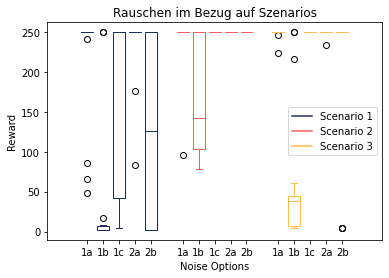

In [57]:
def set_box_color(bp, color,idx):
    plt.setp(bp["boxes"], color=color)
    plt.setp(bp["whiskers"], color=color)
    plt.setp(bp["caps"], color=color)
    plt.setp(bp["medians"], color=color)
    plt.setp(bp["caps"], color=color)
    plt.setp(bp["fliers"], color=color)
import matplotlib.pyplot as plt
from src.main.rl.utils.constants import color_mapping

delay_varies_noise=df[["obs_wrapper","automation_wrapper","scenario","DelayNoiseWrapperOption2_timesteps","DelayNoiseWrapperOption1_timesteps","combination","ObservationVariesNoiseWrapper1_timesteps","ObservationVariesPositiveNoiseWrapper_timesteps","ObservationVariesNegativeNoiseWrapper_timesteps"]]

order_of_col=["ObservationVariesPositiveNoiseWrapper_timesteps","ObservationVariesNegativeNoiseWrapper_timesteps","ObservationVariesNoiseWrapper1_timesteps","DelayNoiseWrapperOption1_timesteps","DelayNoiseWrapperOption2_timesteps"]
fig, ax = plt.subplots()
ax1=ax.boxplot(delay_varies_noise.query("scenario=='src.main.rl.envs.scenario1:Scenario1'")[order_of_col], positions=[0, 0.2,0.4,0.6,0.8], labels=["1a", "1b", "1c", "2a","2b"])
ax2=ax.boxplot(delay_varies_noise.query("scenario=='src.main.rl.envs.scenario2:Scenario2'")[order_of_col],positions=[1.2,1.4,1.6,1.8,2], labels=["1a", "1b", "1c", "2a","2b"])
ax3=ax.boxplot(delay_varies_noise.query("scenario=='src.main.rl.envs.scenario3:Scenario3'")[order_of_col],positions=[2.4,2.6,2.8,3,3.2], labels=["1a", "1b", "1c", "2a","2b"])
set_box_color(ax1, color_mapping["scenario1"],0)
set_box_color(ax1, color_mapping["scenario1"],1)
set_box_color(ax2, color_mapping["scenario2"], 0)
set_box_color(ax2, color_mapping["scenario2"], 1)
set_box_color(ax3, color_mapping["scenario3"], 0)
set_box_color(ax3, color_mapping["scenario3"], 1)
ax.set_xlabel("Noise Options")
ax.set_ylabel("Reward")
plt.plot([], c=color_mapping["scenario1"], label="Scenario 1")
plt.plot([], c=color_mapping["scenario2"], label="Scenario 2")
plt.plot([], c=color_mapping["scenario3"], label="Scenario 3")
plt.legend()
plt.title("Rauschen im Bezug auf Szenarios")
plt.show()
fig.savefig(
    f"src/main/rl/evaluation/plot_results/phase3_noise_by_scen.png",
    format="png",
    dpi=300,
)

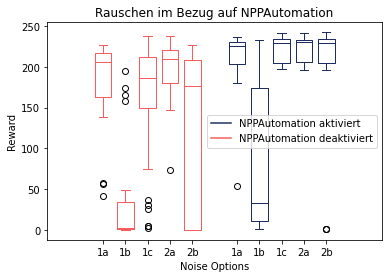

In [54]:
fig, ax = plt.subplots()
ax1=ax.boxplot(delay_varies_noise.query("automation_wrapper.isna()")[order_of_col], positions=[0, 0.2,0.4,0.6,0.8], labels=["1a", "1b", "1c", "2a","2b"])
ax2=ax.boxplot(delay_varies_noise.query("automation_wrapper=='NPPAutomationWrapper'")[order_of_col],positions=[1.2,1.4,1.6,1.8,2],labels=["1a", "1b", "1c", "2a","2b"])
set_box_color(ax1, color_mapping["red"],0)
set_box_color(ax1, color_mapping["red"],1)
set_box_color(ax2, color_mapping["NPPAutomationWrapper"], 0)
set_box_color(ax2, color_mapping["NPPAutomationWrapper"], 1)

ax.set_xlabel("Noise Options")
ax.set_ylabel("Reward")
plt.plot([], c=color_mapping["NPPAutomationWrapper"], label="NPPAutomation aktiviert")
plt.plot([], c=color_mapping["red"], label="NPPAutomation deaktiviert")
plt.legend()
plt.title("Rauschen im Bezug auf NPPAutomation")
plt.show()
fig.savefig(
    f"src/main/rl/evaluation/plot_results/phase3_noise_by_automation.png",
    format="png",
    dpi=300,
)

Criticality Score1: 1.3703107692307692
[0.7828571]
[0.7828571]
[[0, 548, 554], [2000, 1123, 942], [0, 220, 232], [4000, 3999, 3788], [0, 0, 10], [30, 30, 28]]


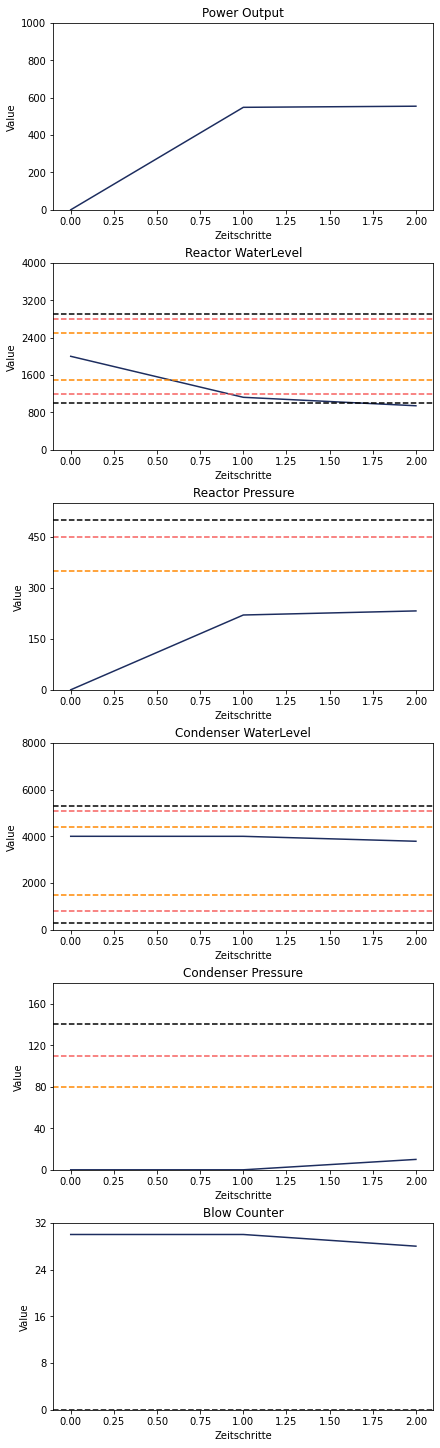

[[0, 521, 554], [2000, 1067, 942], [0, 209, 232], [4000, 3799, 3788], [0, 0, 10], [30, 28, 28]]


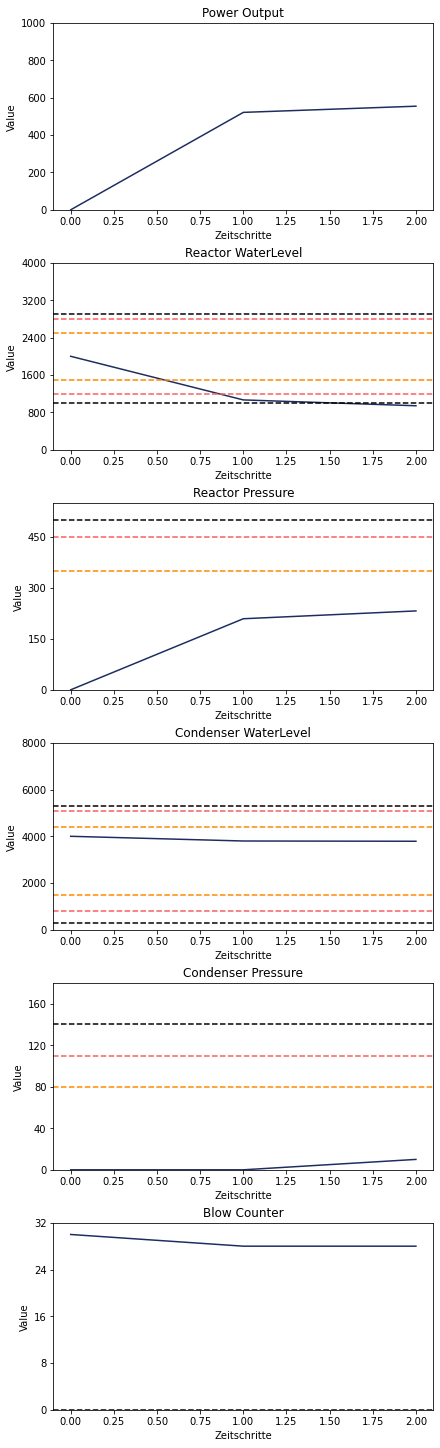

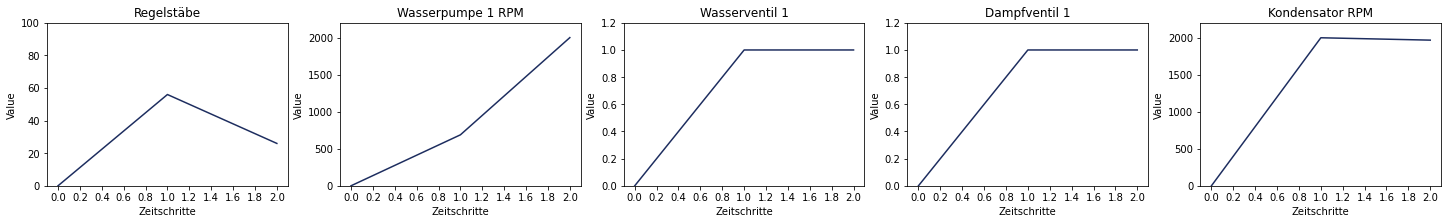

[array([-1.,  0., -1.,  0., -1.,  1.], dtype=float32), [0.3700000000000001, -0.4386129032258065, -0.20161290322580638, -0.00024999999999997247, -1.0, 1.0], array([ 0.384625  , -0.5288    , -0.15709091, -0.0530875 , -0.88388889,
        0.9       ])]
[array([-1.,  0., -1.,  0., -1.,  1.], dtype=float32), array([ 0.3015   , -0.466575 , -0.24     , -0.0502375, -1.       ,
        0.9      ], dtype=float32), array([ 0.384625  , -0.5288    , -0.15709091, -0.0530875 , -0.88388889,
        0.9       ])]


In [10]:
import pandas as pd
from src.main.rl.utils.parser import parse_wrapper
from src.main.rl.utils.combined_parser import parse_information_from_path
from src.main.rl.evaluation.eval import evaluate
from src.main.rl.utils.utils import WrapperMaker
from src.main.rl.evaluation.wrapper.noise.obs_varies_wrapper import ObservationVariesNegativeNoiseWrapper, ObservationVariesPositiveNoiseWrapper
from src.main.rl.evaluation.plots.phase3_plots import plot_observations,plot_actions_taken
from src.main.rl.evaluation.eval import evaluate,evaluate_terminal_state_obs
path = "src/main/rl/models/scenario1/training_04_06/scenario1_ActionSpaceOption3Wrapper_ObservationOption4Wrapper_None_RewardOption2Wrapper_TD3_training_04_06_3"

path_to_overhand = path + "/best_model.zip"
    
action_wrapper, automation_wrapper, obs_wrapper, reward_wrapper = parse_wrapper(path)
scenario, alg, wrapper_maker = parse_information_from_path(path)
wrapper_maker=WrapperMaker(action_wrapper, automation_wrapper, obs_wrapper, reward_wrapper,None,ObservationVariesNegativeNoiseWrapper)
cum_reward, criticality_score, total_timesteps, actions_taken, obs_taken,info = evaluate(scenario, path_to_overhand, alg, wrapper_maker, episode_length=5)
cum_reward2,obs_taken2,info2 = evaluate_terminal_state_obs(scenario, path_to_overhand, alg, wrapper_maker, episode_length=5)

assert cum_reward2==cum_reward
y_axis_scale_obs=[[0, 1000], [0, 4000], [0, 550], [0, 8000], [0, 180],[0, 32]]

# TODO if needed plot also the changed obs into the graphs
fig=plot_observations(obs_taken2,y_axis_scale_obs)
fig1=plot_observations(obs_taken,y_axis_scale_obs)
fig2=plot_actions_taken(actions_taken, "scenario1")
#fig2.savefig(
#    f"src/main/rl/evaluation/plot_results/phase3_noise_combi_1_action_not_working.png",
#    format="png",
#    dpi=300,
#)

In [12]:
wrapper_maker=WrapperMaker(action_wrapper, automation_wrapper, obs_wrapper, reward_wrapper,None,None)
cum_reward, criticality_score, total_timesteps, actions_taken, obs_taken,info = evaluate(scenario, path_to_overhand, alg, wrapper_maker, episode_length=2)
    
from src.main.rl.evaluation.plots.phase3_plots import plot_observations,plot_actions_taken


y_axis_scale_obs=[[0, 1000], [0, 4000], [0, 550], [0, 8000], [0, 180],[0, 32]]
#fig=plot_observations(obs_taken,y_axis_scale_obs)
#fig2=plot_actions_taken(actions_taken, "scenario1")
#fig2.savefig(
#    f"src/main/rl/evaluation/plot_results/phase3_noise_combi_1_action_not_working_comp_with_working.png",
#    format="png",
#    dpi=300,
#)

Criticality Score1: 1.3703107692307692
[0.7828571]


[array([-1.,  0., -1.,  0., -1.,  1.], dtype=float32),
 array([ 3.700000e-01, -4.386129e-01, -2.016129e-01, -2.500000e-04,
        -1.000000e+00,  1.000000e+00], dtype=float32),
 array([ 0.32      , -0.46057889, -0.19064865, -0.00326   , -0.87802419,
         1.        ])]